# IA & Chatbots: Global Solution

Entregáveis:

1.	**Modelo Descritivo:** Façam a análise exploratória de dados da fome (com ao menos 3 gráficos e 3
estatísticas) com dados de índice de fome de 2014 até 2022, disponíveis em:
https://www.kaggle.com/datasets/parasharmanas/global-hunger-index-2022-trends. Verifiquem se existem
possíveis agrupamentos nos dados e como isso muda as estatísticas. (3.5 pontos)


2.	**Modelo Preditivo:** Treine um modelo de regressão para predizer Value (tamanho da produção) a partir de
Year com dados de produção de colheitas de vários países do mundo:
https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank. Faça o treino usando: (a) dados de
todos os países e (b) dados apenas do Brasil. Após isso, discuta: o modelo de Machine Learning aponta um
cenário otimista para o futuro? Qual a predição de produção para 2030? e 2050? (3.5 pontos)

3.	**Modelo Generativo:** em células markdown, discuta "como o ChatGPT e a Inteligência Artificial poderiam ser
aplicados no combate à fome?". Apresente uma solução que utilize um Modelo Generativo de Linguagem
(LLMs, Large Language Models, modelos de linguagem grandes generativos, como o ChatGPT) e/ou Modelos
Generativos de Imagens (como Midjourney e DALL-E). Considere que, apesar do ChatGPT ser uma ferramenta
bastante interessante, existe um problema que os modelos LLMs enfrentam, chamado de Alucinação: os
modelos generativos afirmam com confiança fatos que não parecem ser justificados por seus dados de
treinamento. Discuta como isso poderia afetar o uso de modelos generativos no problema. Compare com os
modelos descritivos e preditivos. (3 pontos)


Turma - 

Insira os nomes e RM na célula abaixo:

--------------------------

In [ ]:
# Nomes e RM:
# Bruna Menegatti Vienna - RM 96848
# Kaue Caponero Figueiredo - RM 96466
# Mariana Santos Fernandes de Sousa - RM 97503

# Exercício 1 - Modelo Descritivo

---



Façam a análise exploratória de dados da fome (com ao menos 3 gráficos e 3
estatísticas) com dados de índice de fome de 2014 até 2022, disponíveis em:
https://www.kaggle.com/datasets/parasharmanas/global-hunger-index-2022-trends. Verifiquem se existem
possíveis agrupamentos nos dados e como isso muda as estatísticas. (3.5 pontos)

In [4]:
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import adjusted_rand_score, silhouette_score

import statistics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_hunger.csv to dataset_hunger.csv


In [5]:
dados = pd.read_csv("dataset_hunger.csv", sep=',', encoding='latin-1')

# Removendo a primeira linha que vem com dados inválidos como NaN
dados = dados.drop(0)

In [6]:
# removendo os caracteres "<" e fazendo a média dos que tem o caractere "-" para 
# converter em todas as colunas numéricas (todas, menos a do nome do país)

colunas_a_converter = ['2000', '2007', '2014', '2022']

for coluna in colunas_a_converter:
    dados[coluna] = dados[coluna].str.replace('<', '')
    dados[coluna] = dados[coluna].str.replace('–', '-').str.replace('\x96', '-').str.split('-').apply(lambda x: (float(x[0]) + float(x[1])) / 2 if len(x) == 2 else float(x[0]))
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

In [7]:
dados.head()

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
1,1.0,Belarus,5.0,5.0,5.0,5.0,0,0
2,1.0,Bosnia and Herzegovina,9.3,6.6,5.0,5.0,0,0
3,1.0,Chile,5.0,5.0,5.0,5.0,0,0
4,1.0,China,13.3,7.8,5.0,5.0,0,0
5,1.0,Croatia,5.0,5.0,5.0,5.0,0,0


# **Gráfico 01: Distribuição dos Índices de Fome em 2022**:


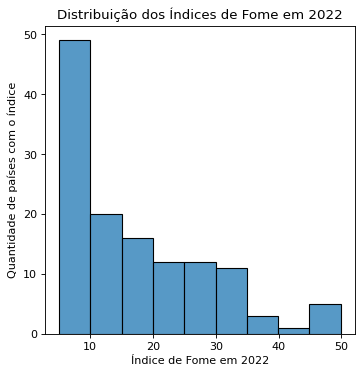

In [8]:
plt.figure(figsize = (5, 5), dpi = 80)
sns.histplot(data = dados, x = '2022')
plt.xlabel('Índice de Fome em 2022')
plt.ylabel('Quantidade de países com o índice')
plt.title('Distribuição dos Índices de Fome em 2022')
plt.show()

# **Gráfico 02 (gráfico de barras): Ranking - TOP 10 países com maior Índice de Fome em 2022 e seus índices**:



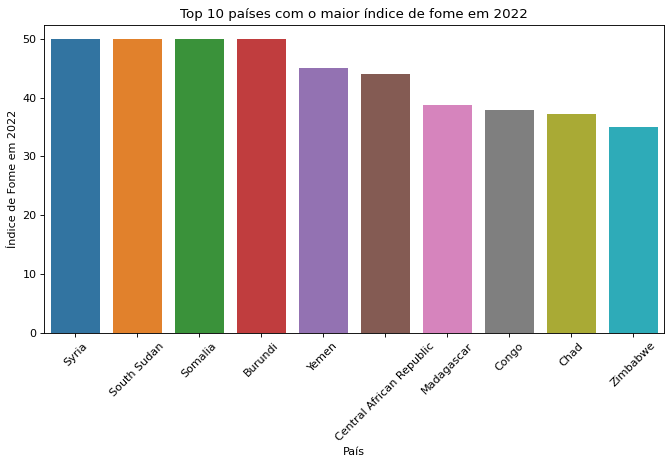

In [9]:
# Gráfico mostrando os 10 países com maior índice de fome em 2022
plt.figure(figsize = (10, 5), dpi = 80)
top_countries_rank = dados.sort_values('2022', ascending=False).head(10)
sns.barplot(data = top_countries_rank, x = 'Country', y = '2022')
plt.xlabel('País')
plt.ylabel('Índice de Fome em 2022')
plt.title('Top 10 países com o maior índice de fome em 2022')
plt.xticks(rotation=45)
plt.show()

# **Gráfico 03 (gráfico de linha): Evolução do índice de Fome ao passar dos anos dos países que tiveram uma posição elevada no ranking de fome em 2022**:

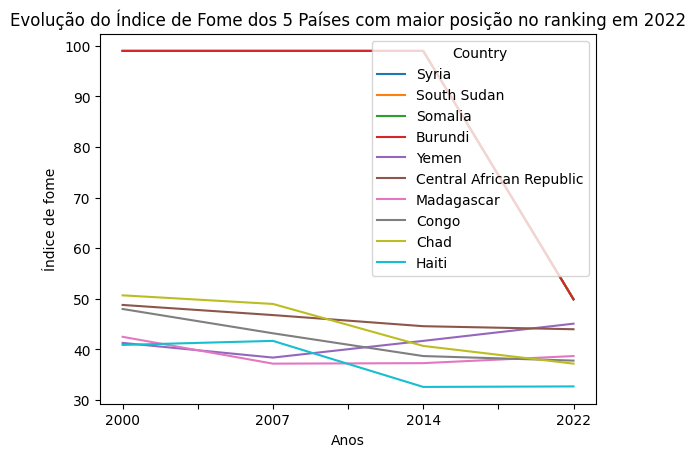

In [14]:
# Gráfico mostrando o crescimento do índice de fome nos países com maior evolução na coluna "Absolute Change"
dados_filtrados = dados.sort_values('Rank in 2022', ascending=False).head(10)
df_grafico = dados_filtrados[['Country', '2000', '2007', '2014', '2022']]
df_grafico.set_index('Country', inplace=True)
df_grafico = df_grafico.T
df_grafico.plot()
plt.xlabel('Anos')
plt.ylabel('Índice de fome')
plt.title('Evolução do Índice de Fome dos 5 Países com maior posição no ranking em 2022')
plt.show()

# **Gráfico 04 (gráfico de dispersão): Relação entre as colunas: mudança percentual e mudança absoluta**:

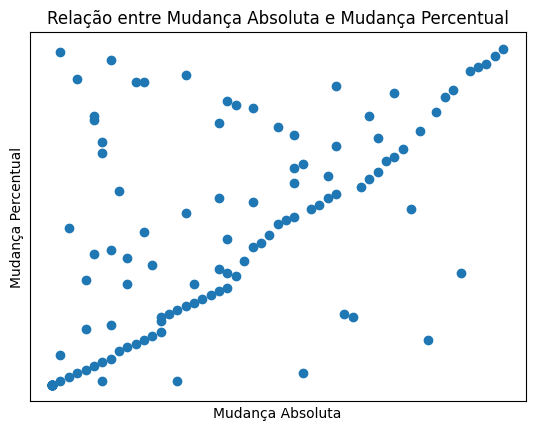

In [11]:
# plt.figure(figsize = (20, 5), dpi = 80)
plt.scatter(dados['Absolute change'], dados['Percent change'])

plt.xlabel('Mudança Absoluta')
plt.ylabel('Mudança Percentual')
plt.title('Relação entre Mudança Absoluta e Mudança Percentual')

plt.xticks([])
plt.yticks([])

plt.show()

# **Gráficos 05: gráfico de pares que mostra a relação entre todas as combinações possíveis de variáveis numéricas no DataFrame dados**:

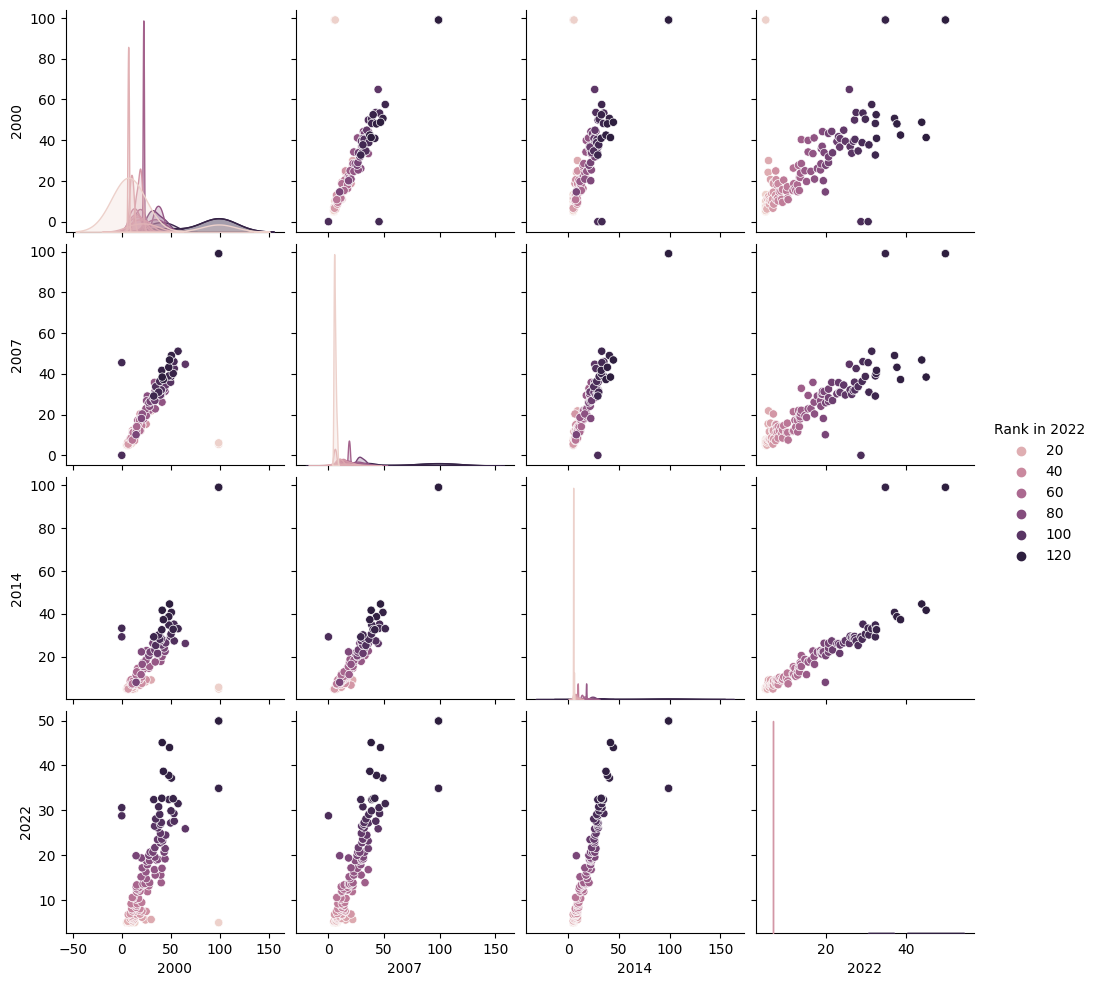

In [12]:
sns.pairplot(dados, hue='Rank in 2022')

# Verificando se os dados podem ser agrupados:



<ipython-input-19-6cf7228cddbb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cluster.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


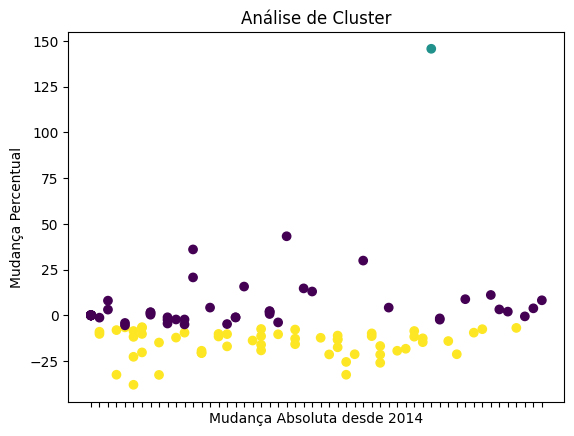

In [19]:
# Limpando dados inválidos
dados['Percent change'] = dados['Percent change'].apply(lambda x: np.nan if x == '.7.5' or x == '10..6' else x)
dados['Percent change'] = dados['Percent change'].astype(float)

#Separando apenas as colunas que queremos avaliar as mudanças
dados_cluster = dados[['Absolute change', 'Percent change']]

dados_cluster.dropna(inplace=True)

km = KMeans(n_clusters = 3, random_state = 42)
km_c = km.fit_predict(dados_cluster)

plt.scatter(dados_cluster['Absolute change'], dados_cluster['Percent change'], c = km_c, cmap = 'viridis')

plt.xlabel('Mudança Absoluta desde 2014')
plt.ylabel('Mudança Percentual')
plt.title('Análise de Cluster')

plt.xticks(visible=False)

plt.show()

##Análise de agrupamento:
---

#####Analisando o gráfico, não foi possível identificar nenhum agrupamento relevante visível para os nossos dados, uma vez que a mudança absoluta varia de forma parecida e a mudança percentual não diz nada relevante pras estatísticas.


# **Estatística 01:**

Calculando a média do índice de fome para cada ano para visualizar a tendência geral ao longo dos anos:

In [21]:
indices_fome_ano = [dados['2000'], dados['2007'], dados['2014'], dados['2022']]
medias = [statistics.mean(ano) for ano in indices_fome_ano]

print(medias)

[30.132558139534883, 25.25736434108527, 21.63953488372093, 17.17062015503876]


# **Estatística 02:**

Calculando o desvio padrão do índice de fome para cada ano a fim de medir a dispersão dos dados ao redor da média:

In [22]:
desvios_padrao = [statistics.stdev(ano) for ano in indices_fome_ano]

print(desvios_padrao)

[24.697609204861237, 22.666411601178318, 22.37223592775154, 11.812894925735419]


# **Estatística 03:**

Calculando o coeficiente de variação do desvio padrão em relação à média:

In [23]:
coef_variacao = [(desvio_padrao / media) * 100 for media, desvio_padrao in zip(medias, desvios_padrao)]

print(coef_variacao)

[81.96320103488718, 89.7417929087227, 103.38593711910976, 68.79713614926656]


# **Estatística 04:**

Calcular o coeficiente de correlação entre o índice de fome e o ranking do país para cada ano a fim de visualizar como o ranking está relacionado ao índice de fome.

In [24]:
coef_correlacao = []
for ano in ['2000', '2007', '2014', '2022']:
    coef = dados[ano].corr(dados['Rank in 2022'])
    coef_correlacao.append(coef)

for i, ano in enumerate(['2000', '2007', '2014', '2022']):
    print(f"Coeficiente de correlação em {ano}: {coef_correlacao[i]}")

Coeficiente de correlação em 2000: 0.6231862390149202
Coeficiente de correlação em 2007: 0.7531506327610704
Coeficiente de correlação em 2014: 0.7232989728129431
Coeficiente de correlação em 2022: 0.9236330298294341


# Exercício 2 - Modelo Preditivo
---
Treine um modelo de regressão para predizer Value (tamanho da produção) a partir de
Year com dados de produção de colheitas de vários países do mundo:
https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank. Faça o treino usando: 

*   dados de todos os países e 
*   dados apenas do Brasil. 

Após isso, discuta: o modelo de Machine Learning aponta um
cenário otimista para o futuro? Qual a predição de produção para 2030? e 2050?

In [25]:
#upload do primeiro csv
uploaded = files.upload()

Saving food-wealth-bank-1.csv to food-wealth-bank-1.csv


In [26]:
dados_prod_colheita = pd.read_csv("food-wealth-bank-1.csv", sep=',', encoding='latin-1')

dados_prod_colheita.head(10)

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0
5,Afghanistan,Asses,Stocks,1966,Head,1200000.0
6,Afghanistan,Asses,Stocks,1967,Head,1200000.0
7,Afghanistan,Asses,Stocks,1968,Head,1328000.0
8,Afghanistan,Asses,Stocks,1969,Head,1250000.0
9,Afghanistan,Asses,Stocks,1970,Head,1300000.0


In [28]:
# Removevendo linhas com valores ausentes
dados_prod_colheita.dropna(subset=['Value'], inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [30]:
# Escolhendo as colunas preditivas e alvo
X = dados_prod_colheita['Year'].values.reshape(-1, 1)
y = dados_prod_colheita['Value'].values # Classe alvo

In [31]:
# Dividindo conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(12019, 108175, 12019, 108175)

In [32]:
# Treinando o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Fazendo previsões para os dados de teste
y_predicoes = lr.predict(X_test)

In [34]:
# Avaliar o desempenho do modelo
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes)  # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,       # Gabarito
                         y_pred = y_predicoes)  # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test,                  # Gabarito
              y_pred = y_predicoes)             # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE:  16644665.841537505
MSE:  3463113823845565.5
raiz MSE:  58848227.02380732
R2:  0.00022058292856352857


In [35]:
# Fazendo previsões para 2030 e 2050 usando todos os países
previsao_2030_all = lr.predict([[2030]])
previsao_2050_all = lr.predict([[2050]])

print("2030:", previsao_2030_all[0])
print("2050:", previsao_2050_all[0])

2030: 14770435.575987637
2050: 17286042.556978613


In [44]:
# Filtrando os dados apenas para o Brasil
dados_prod_colheita_brasil = dados_prod_colheita[dados_prod_colheita['Area'] == 'Brazil']

X_brasil = dados_prod_colheita_brasil['Year'].values.reshape(-1, 1)
y_brasil = dados_prod_colheita_brasil['Value'].values.reshape(-1, 1)

dados_prod_colheita_brasil.head(10)


,Area,Item,Element,Year,Unit,Value
10813,Brazil,Asses,Stocks,1961,Head,1044000.0
10814,Brazil,Asses,Stocks,1962,Head,1083000.0
10815,Brazil,Asses,Stocks,1963,Head,1148000.0
10816,Brazil,Asses,Stocks,1964,Head,1225000.0
10817,Brazil,Asses,Stocks,1965,Head,1309000.0
10818,Brazil,Asses,Stocks,1966,Head,1368000.0
10819,Brazil,Asses,Stocks,1967,Head,1372000.0
10820,Brazil,Asses,Stocks,1968,Head,1426000.0
10821,Brazil,Asses,Stocks,1969,Head,1438000.0
10822,Brazil,Asses,Stocks,1970,Head,1420000.0


In [37]:
# Dividindo conjunto de treinamento e conjunto de teste
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_brasil, y_brasil, test_size = 0.9, random_state = 42)

len(X_train_br), len(X_test_br), len(y_train_br), len(y_test_br)

(72, 648, 72, 648)

In [38]:
lr_brasil = LinearRegression()
lr_brasil.fit(X_brasil, y_brasil)

LinearRegression()

In [39]:
# Fazendo previsões para os dados de teste
y_predicoes_br = lr_brasil.predict(X_test_br)

In [40]:
# Avaliar o desempenho do modelo
MAE = mean_absolute_error(y_true = y_test_br,      # Gabarito
                         y_pred = y_predicoes_br)  # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test_br,       # Gabarito
                         y_pred = y_predicoes_br)  # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test_br,                  # Gabarito
              y_pred = y_predicoes_br)             # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE:  24717539.03567305
MSE:  1877412059261067.0
raiz MSE:  43329113.29880946
R2:  0.015296938920649206


In [41]:
# Fazendo previsões para 2030 e 2050 usando apenas os dados do Brasil
previsao_2030_brasil = lr_brasil.predict([[2030]])
previsao_2050_brasil = lr_brasil.predict([[2050]])

print("Previsão de produção usando apenas dados do Brasil:")
print("2030:", previsao_2030_brasil[0])
print("2050:", previsao_2050_brasil[0])

Previsão de produção usando apenas dados do Brasil:
2030: [29122040.05696249]
2050: [34803140.20394778]


 ## O modelo de Machine Learning aponta um cenário otimista para o futuro? Qual a predição de produção para 2030? e 2050?

 Essas previsões indicam um aumento na produção ao longo dos anos, sugerindo um cenário positivo para o setor analisado. A predição de produção de todos os países para 2030 foi de aproximadamente 14770435 unidades e 2050 17286042 unidades.

 Com base nos resultados do modelo de regressão usando apenas dados do Brasil, a previsão para o valor de produção em 2030 é de aproximadamente 29.122.040 unidades, enquanto a previsão para 2050 é de cerca de 34.803.140 unidades.

Considerando apenas esses valores, podemos dizer que o modelo de Machine Learning aponta para um cenário otimista para o futuro da produção no Brasil. As previsões indicam um aumento significativo na produção ao longo dos anos, sugerindo um cenário positivo e um potencial de crescimento para o setor.

# Exercício 3 - Modelo Generativo
---
Em células markdown, discuta "como o ChatGPT e a Inteligência Artificial poderiam ser aplicados no combate à fome?". Apresente uma solução que utilize um Modelo Generativo de Linguagem (LLMs, Large Language Models, modelos de linguagem grandes generativos, como o ChatGPT) e/ou Modelos Generativos de Imagens (como Midjourney e DALL-E). Considere que, apesar do ChatGPT ser uma ferramenta bastante interessante, existe um problema que os modelos LLMs enfrentam, chamado de Alucinação: os modelos generativos afirmam com confiança fatos que não parecem ser justificados por seus dados de treinamento. Discuta como isso poderia afetar o uso de modelos generativos no problema. Compare com os modelos descritivos e preditivos. (3 pontos)

## **Discussão**

A aplicação de tecnologias baseadas em inteligência artificial, como o ChatGPT, Midjourney e DALL-E, no combate à fome tem o potencial de trazer benefícios significativos. Esses modelos generativos possuem capacidade de fornecer orientações e informações relevantes para os agricultores, auxiliar na identificação e classificação de alimentos, além de contribuir para a educação nutricional, previsão de safra, otimização de rotas de distribuição e detecção de desperdício de alimentos.

O ChatGPT, um modelo generativo de linguagem, pode ser utilizado para responder perguntas relacionadas a práticas agrícolas, oferecer dicas de manejo de culturas e auxiliar na solução de problemas enfrentados pelos agricultores. Através de interações com o ChatGPT, um agricultor pode obter orientações sobre controle de pragas e informações sobre os melhores momentos para o plantio de determinadas culturas em sua região. Além disso, os modelos generativos podem ser empregados para desenvolver chatbots educativos que fornecem informações nutricionais e dicas de alimentação saudável, contribuindo para a conscientização e a melhoria da qualidade da alimentação em comunidades com insegurança alimentar.

Por sua vez, os modelos generativos de imagens, como o Midjourney e o DALL-E, desempenham um papel importante no combate à fome ao auxiliar na identificação e classificação de diferentes tipos de alimentos. Ao analisar imagens de alimentos, esses modelos podem fornecer informações sobre qualidade, frescor e valor nutricional dos mesmos. Essa capacidade é particularmente útil em sistemas de triagem de alimentos em organizações de caridade ou programas de distribuição de alimentos, ajudando a garantir que os alimentos estejam em boas condições e sejam adequados para consumo. Além disso, esses modelos podem ser aplicados na detecção de alimentos em estado de deterioração ou prestes a serem desperdiçados, permitindo ações adequadas para evitar o desperdício alimentar.

A inteligência artificial também desempenha um papel importante na análise de dados de segurança alimentar. Por meio de algoritmos e modelos descritivos, é possível analisar grandes conjuntos de dados relacionados à segurança alimentar, como registros de inspeções sanitárias e relatórios de surtos de doenças transmitidas por alimentos. Essa análise pode ajudar na identificação de padrões e tendências, auxiliando na tomada de decisões e no desenvolvimento de políticas para garantir a segurança dos alimentos.

Além disso, os modelos preditivos podem ser utilizados para prever a produção agrícola e estimar a disponibilidade de alimentos em determinada região, permitindo um planejamento mais eficiente das atividades de distribuição e evitando desperdícios. Algoritmos baseados em inteligência artificial também podem ser empregados para otimizar as rotas de distribuição de alimentos, levando em consideração fatores como a demanda, a localização dos produtores e a capacidade de armazenamento, resultando em uma distribuição mais eficiente e rápida dos alimentos.

Em resumo, a aplicação de modelos generativos e preditivos baseados em inteligência artificial, como o ChatGPT, Midjourney e DALL-E, oferece uma abordagem abrangente para combater a fome. Essas tecnologias fornecem orientações e informações valiosas para os agricultores, auxiliam na identificação e classificação de alimentos, contribuem para a educação nutricional, previsão de safra, otimização de rotas de distribuição, detecção de desperdício de alimentos e análise de dados de segurança alimentar. No entanto, é fundamental utilizá-las com cautela, complementando as informações geradas com fontes de dados confiáveis, a fim de garantir resultados precisos e confiáveis.

É importante ressaltar que os modelos generativos baseados em inteligência artificial podem enfrentar desafios, como o problema da alucinação. Isso significa que esses modelos podem gerar informações imprecisas ou não fundamentadas nos dados de treinamento, o que pode resultar em orientações ou classificações equivocadas de alimentos.

Para mitigar esse problema, é fundamental complementar as informações geradas por esses modelos com fontes de dados confiáveis. Além disso, é recomendado utilizar modelos descritivos e preditivos para verificar e validar as informações obtidas. Os modelos descritivos podem ser empregados na análise de dados históricos para identificar padrões de produção de alimentos, demanda de mercado e distribuição geográfica de recursos agrícolas. Já os modelos preditivos podem utilizar esses dados históricos, juntamente com outras variáveis relevantes, para fazer previsões sobre a produção futura de alimentos, estimar demandas futuras, planejar a distribuição de alimentos e identificar possíveis escassezes.

Dessa forma, a combinação de diferentes tipos de modelos, como os generativos, descritivos e preditivos, pode oferecer uma abordagem mais abrangente e precisa para enfrentar os desafios da segurança alimentar, minimizando os riscos associados à alucinação dos modelos generativos.


